In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from IPython.display import display
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ucimlrepo import fetch_ucirepo

In [ ]:

import pandas as pd
import zipfile
import io
import requests

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

with zip_file.open("bank-full.csv") as file:
    bank_marketing = pd.read_csv(file, sep=';')
X = bank_marketing.drop(columns = ["y"])
y = bank_marketing['y']

display(bank_marketing.head())
display(bank_marketing.describe())


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [23]:
## the target variable (y) to the features in the dataframe(X) it is added  for ease of analysis
data = bank_marketing.copy()

## Renamed column  day for day_of_month
data.rename(columns={'day': 'day_of_month'}, inplace=True)

## Drop columns with missing values and the column duration which should not be used for realistic predictions
data.drop(columns=['contact', 'poutcome', 'pdays','duration'], inplace=True)

## Printing the first rows of the dataset
print("First rows of the dataset") 
display(data.head(10))

# Check for missing values
missing_values = data.isnull().sum()
missing_values_df =pd.DataFrame(missing_values, columns=['Missing values'])
display(missing_values_df)

First rows of the dataset


,age,job,marital,education,default,balance,housing,loan,day_of_month,month,campaign,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,1,0,no
4,33,unknown,single,unknown,no,1,no,no,5,may,1,0,no
5,35,management,married,tertiary,no,231,yes,no,5,may,1,0,no
6,28,management,single,tertiary,no,447,yes,yes,5,may,1,0,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,5,may,1,0,no
8,58,retired,married,primary,no,121,yes,no,5,may,1,0,no
9,43,technician,single,secondary,no,593,yes,no,5,may,1,0,no


,Missing values
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
day_of_month,0
month,0


In [24]:
## Summary of statistics
print("\nSummary statistics of the dataset: ")
display(data.describe(include='all'))


Summary statistics of the dataset: 


,age,job,marital,education,default,balance,housing,loan,day_of_month,month,campaign,previous,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211
unique,NaN,12,3,4,2,NaN,2,2,NaN,12,NaN,NaN,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,NaN,may,NaN,NaN,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,NaN,13766,NaN,NaN,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,15.806419,NaN,2.763841,0.580323,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,8.322476,NaN,3.098021,2.303441,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,1.000000,NaN,1.000000,0.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,8.000000,NaN,1.000000,0.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,16.000000,NaN,2.000000,0.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,21.000000,NaN,3.000000,0.000000,NaN


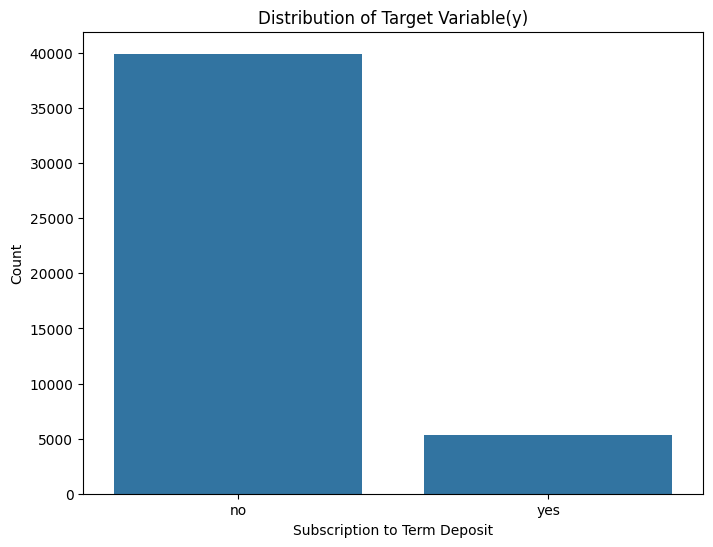

In [25]:
# Distrubution of the target variable

plt.figure(figsize=(8,6))
sns.countplot(x='y', data=data)
plt.title('Distribution of Target Variable(y)')
plt.xlabel('Subscription to Term Deposit')
plt.ylabel('Count') 
plt.show()

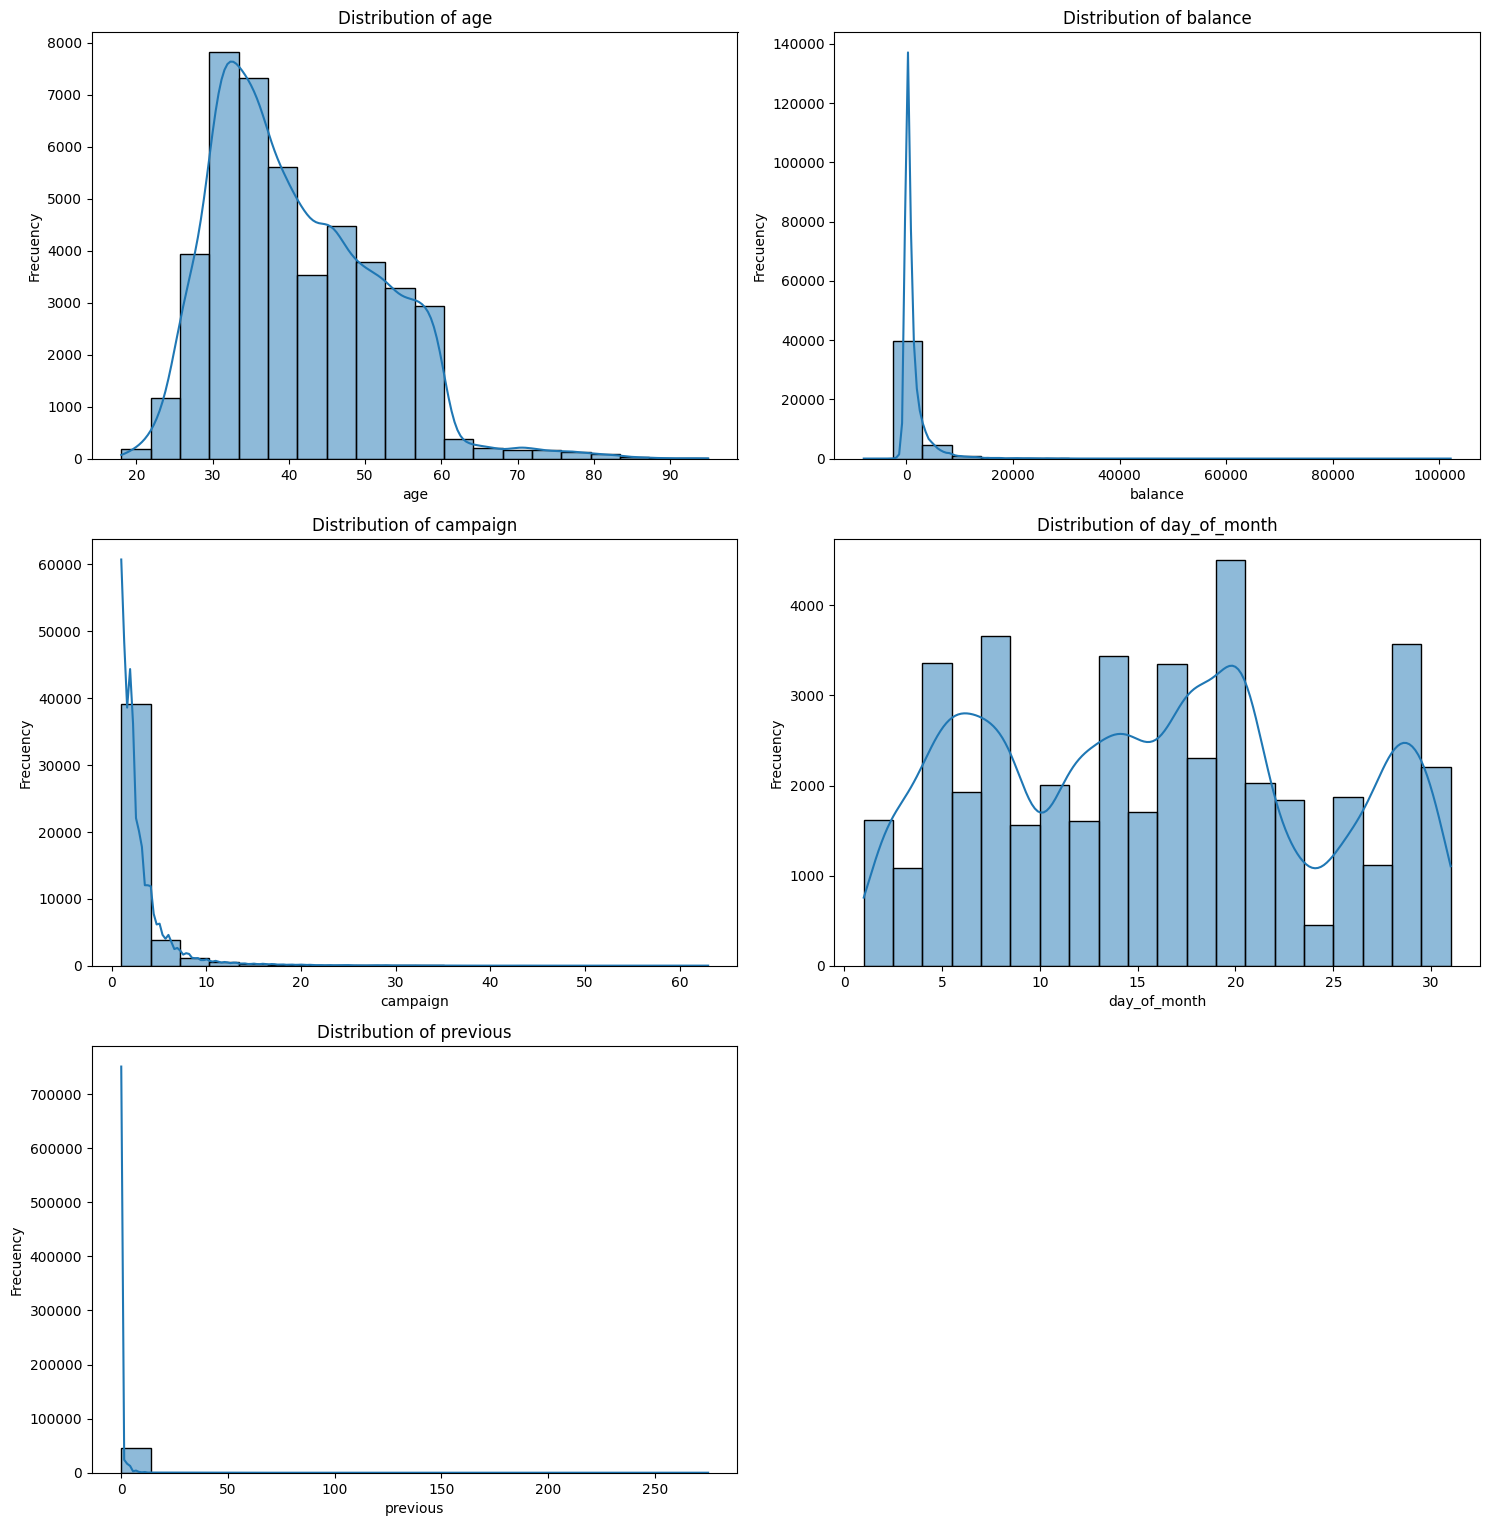

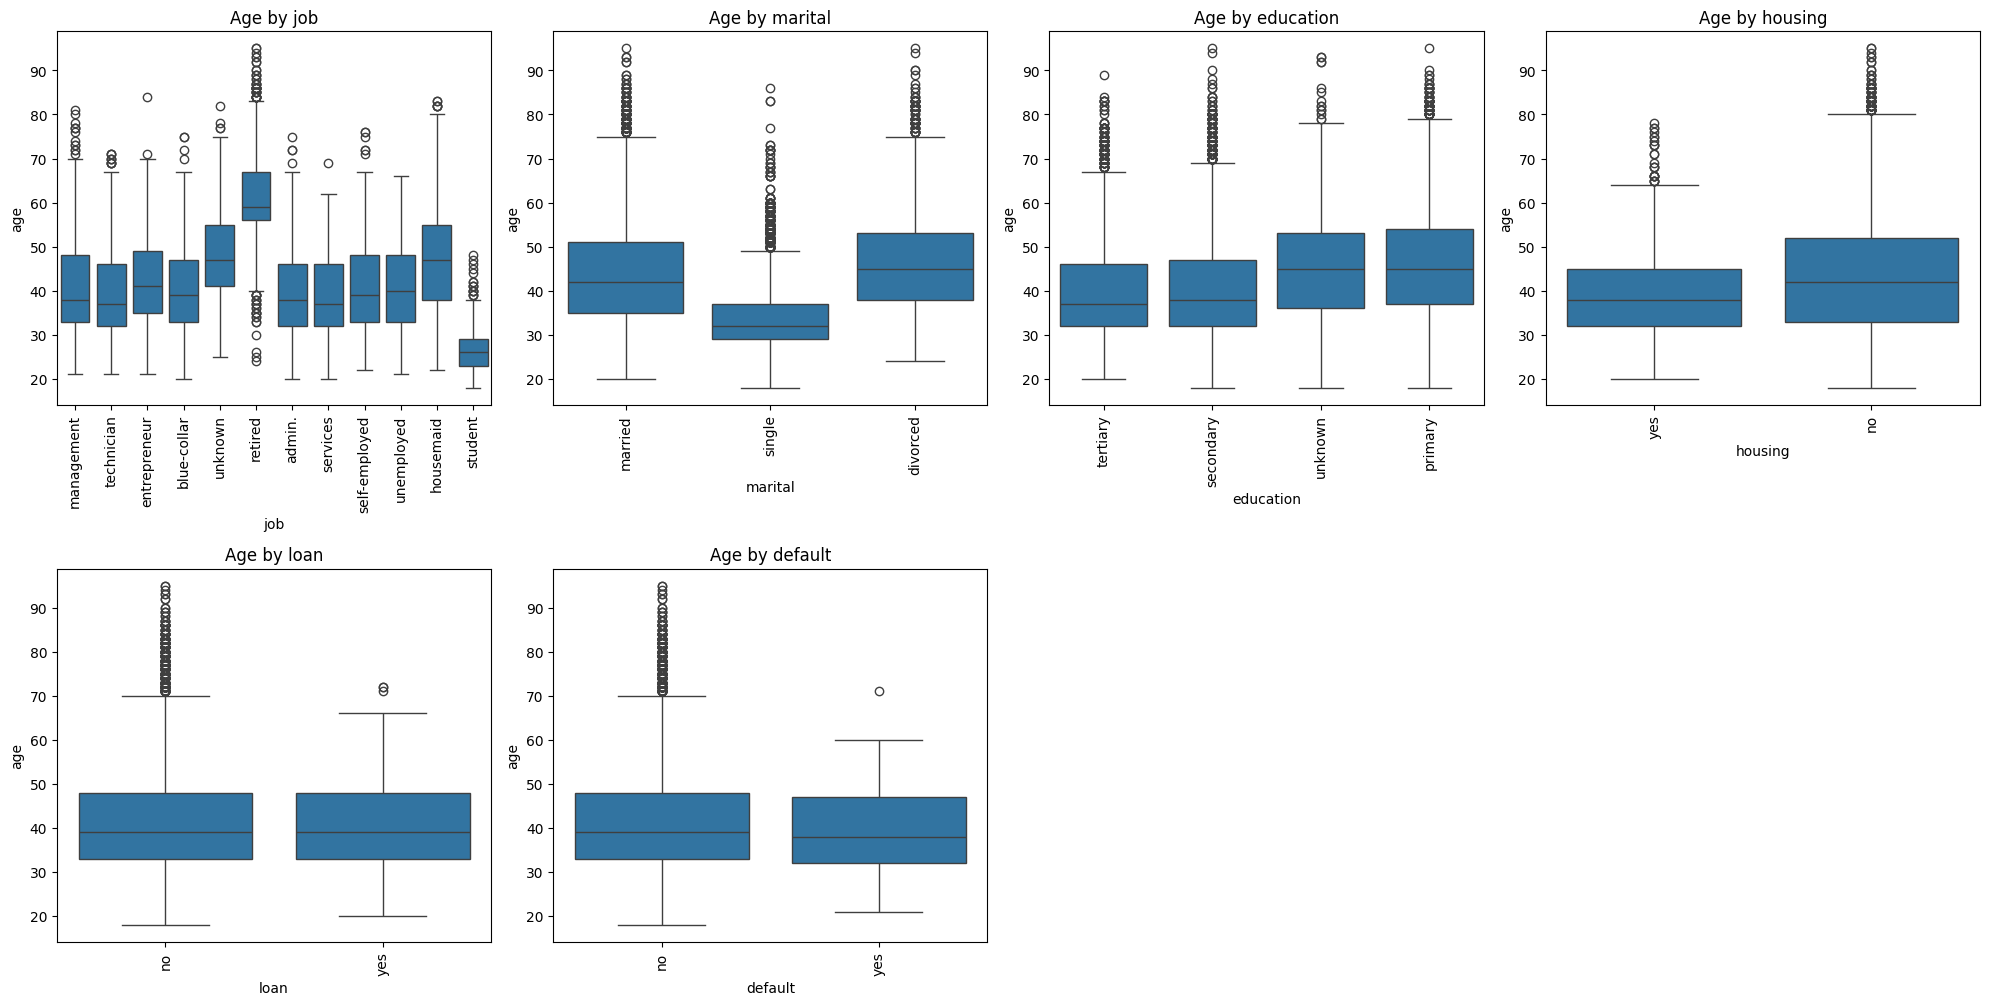

In [28]:


# Label encoder  is typically used to convert categorical labels into numerical values.
data['y_numeric'] = LabelEncoder().fit_transform(data['y'])

# Histograms of Numerical features
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate through them

# List of numerical features
numerical_features = ['age', 'balance', 'campaign','day_of_month','previous']

# Histograms for numerical features

for i, feature in enumerate(numerical_features):
   sns.histplot(data[feature].dropna(), bins=20, kde=True, ax=axes[i])
   axes[i].set_title(f'Distribution of {feature}')
   axes[i].set_xlabel(feature)
   axes[i].set_ylabel('Frecuency')

# Remove empty subplots 
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

# Categorical features
categorical_features = ['job','marital', 'education', 'housing', 'loan','default']
plt.figure(figsize=(20,15))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3,4,i)
    sns.boxplot(x=feature, y='age', data=data)
    plt.title(f'Age by {feature}')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

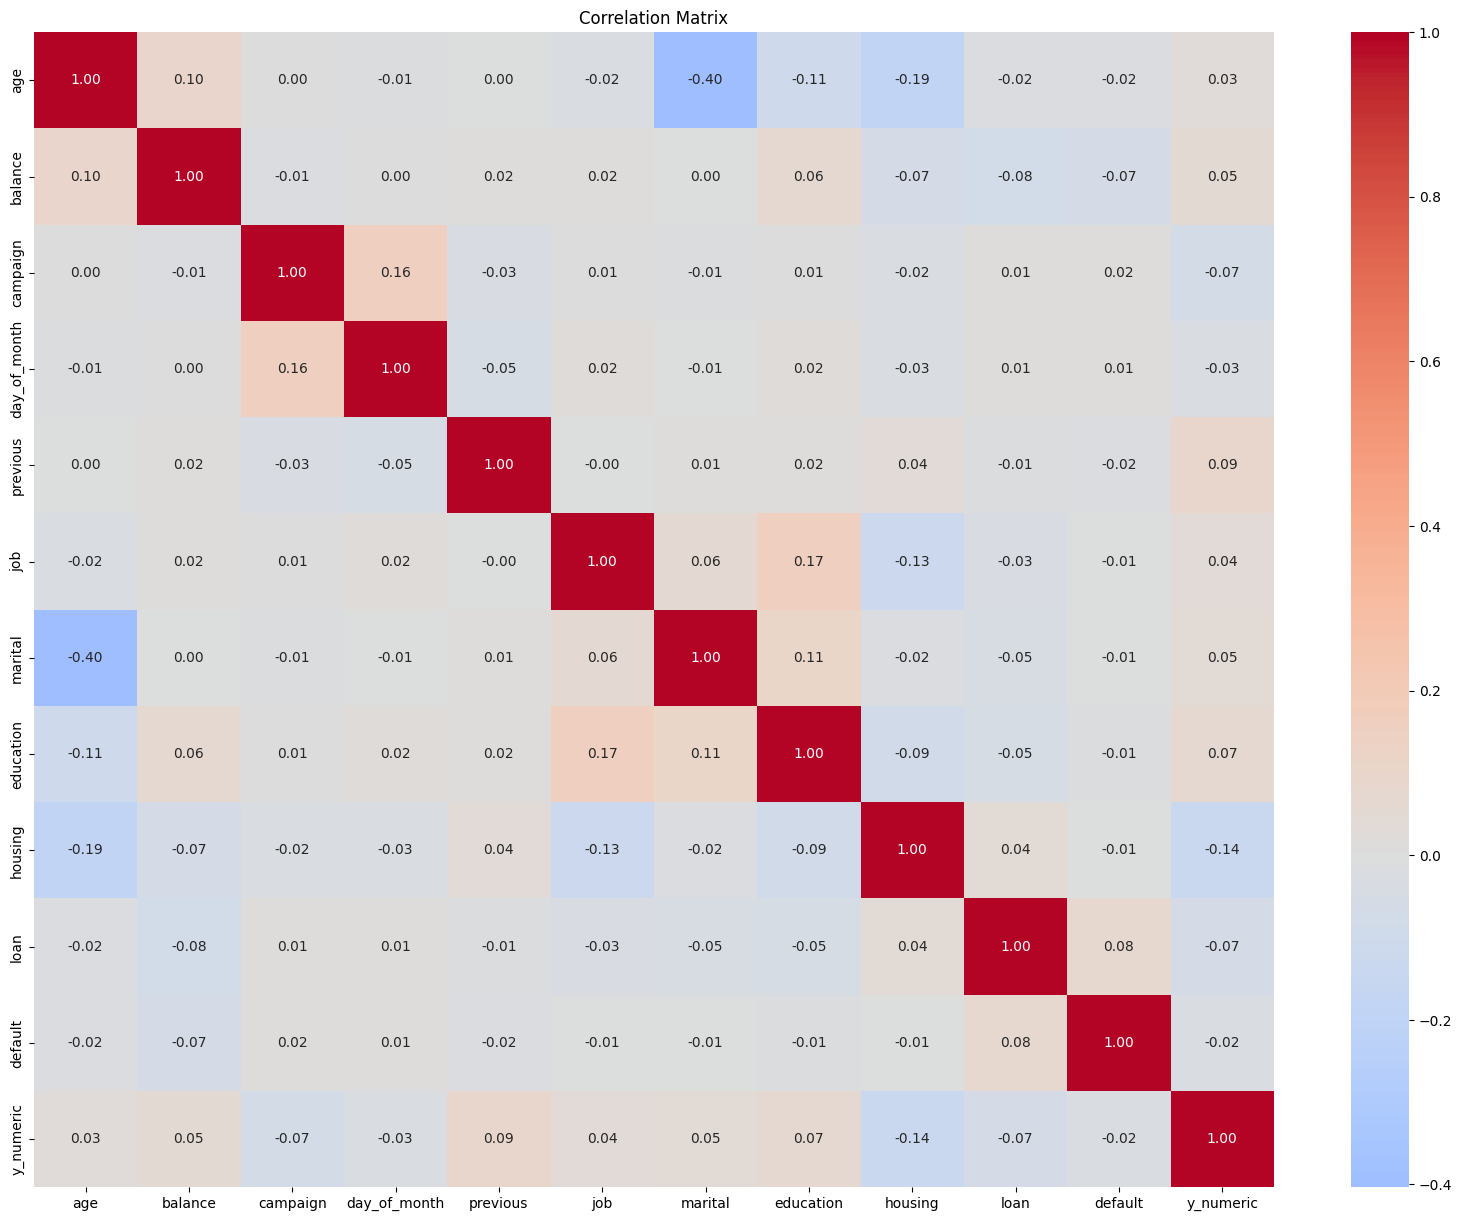

y_numeric       1.000000
previous        0.093236
education       0.066241
balance         0.052838
marital         0.045588
job             0.040438
age             0.025155
default        -0.022419
day_of_month   -0.028348
loan           -0.068185
campaign       -0.073172
housing        -0.139173
Name: y_numeric, dtype: float64

In [29]:
for feature in categorical_features:
    data[feature] = LabelEncoder().fit_transform(data[feature])

# Combine encoded categorical features with numerical features
data_Eoncoded = pd.concat([data[numerical_features], data[categorical_features],data['y_numeric']], axis=1)

#Correlation Matrix (numerical and categorical encoded features)
plt.figure(figsize=(20, 15))
sns.heatmap(data_Eoncoded.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Print the correlation values of features with y_numeric
correlation_with_target = data_Eoncoded.corr()['y_numeric'].sort_values(ascending=False)
display(correlation_with_target)

In [31]:
# Display rows datasets

print("Encoded Dataset Rows")
display(data.head(10))
    

Encoded Dataset Rows


,age,job,marital,education,default,balance,housing,loan,day_of_month,month,campaign,previous,y,y_numeric
0,58,4,1,2,0,2143,1,0,5,8,1,0,0,0
1,44,9,2,1,0,29,1,0,5,8,1,0,0,0
2,33,2,1,1,0,2,1,1,5,8,1,0,0,0
3,47,1,1,3,0,1506,1,0,5,8,1,0,0,0
4,33,11,2,3,0,1,0,0,5,8,1,0,0,0
5,35,4,1,2,0,231,1,0,5,8,1,0,0,0
6,28,4,2,2,0,447,1,1,5,8,1,0,0,0
7,42,2,0,2,1,2,1,0,5,8,1,0,0,0
8,58,5,1,0,0,121,1,0,5,8,1,0,0,0
9,43,9,2,1,0,593,1,0,5,8,1,0,0,0


In [34]:
#Split the data into training and testing sets

X = data.drop(columns=['y', 'y_numeric'])
Y = data['y_numeric']

# Split data into training and testing sets 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Test the splitting

print(f"Training set size: {X_train_val.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 31647 samples
Testing set size: 13564 samples


In [35]:
# SMOTE To balance the training set 
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_val, y_train_val)

In [36]:
# Initialize the scaler and ensuring that all numerical features have the same scale
scaler = StandardScaler()

# Fit the scaler on the training data, transform both training and test data 

X_train_res[all_features] = scaler.fit_transform(X_train_res[all_features]) # Calculates the mean and standard deviation ot the dataset
X_test[all_features] = scaler.transform(X_test[all_features]) ## uses the mean and standard deviation calculated from the training data to scale the test data.

# Test the scaling

print("\nSummary Statistics of the Scaled Training Set: ")
display(X_train_res.describe())

print("\nSummary Statistics of the Scaled Testing Set: ")
display(X_test.describe())


Summary Statistics of the Scaled Training Set: 


,age,job,marital,education,default,balance,housing,loan,day_of_month,month,campaign,previous
count,5.591200e+04,5.591200e+04,5.591200e+04,5.591200e+04,55912.000000,5.591200e+04,5.591200e+04,5.591200e+04,5.591200e+04,55912.000000,5.591200e+04,5.591200e+04
mean,-2.277315e-16,-5.134126e-17,1.321656e-16,-3.659971e-17,0.000000,-3.354974e-17,-1.626654e-17,3.253308e-17,1.829986e-17,5.272231,-3.659971e-17,-2.439981e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,2.979698,1.000009e+00,1.000009e+00
min,-1.994187e+00,-1.404994e+00,-1.780753e+00,-1.650192e+00,-0.107606,-2.718864e+00,-7.979775e-01,-3.290708e-01,-1.771968e+00,0.000000,-5.158404e-01,-3.226160e-01
25%,-7.777850e-01,-1.077273e+00,-1.586109e-01,-2.248014e-01,-0.107606,-4.549441e-01,-7.979775e-01,-3.290708e-01,-9.066021e-01,3.000000,-5.158404e-01,-3.226160e-01
50%,-2.564697e-01,-9.411014e-02,-1.586109e-01,-2.248014e-01,-0.107606,-3.152962e-01,-7.979775e-01,-3.290708e-01,-4.123592e-02,6.000000,-1.299109e-01,-3.226160e-01
75%,6.992751e-01,8.890524e-01,-1.586109e-01,1.200589e+00,-0.107606,7.222672e-02,1.253168e+00,-3.290708e-01,7.005065e-01,8.000000,2.560186e-01,1.378334e-01
max,4.696026e+00,2.199936e+00,1.463531e+00,2.625980e+00,9.293143,2.587680e+01,1.253168e+00,3.038860e+00,1.936744e+00,11.000000,2.341179e+01,1.263010e+02



Summary Statistics of the Scaled Testing Set: 


,age,job,marital,education,default,balance,housing,loan,day_of_month,month,campaign,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,-0.002461,0.027782,0.109992,0.105170,0.032393,-0.049552,0.341161,0.208745,0.051764,5.524329,0.157317,-0.061364
std,0.919962,1.074019,0.992571,1.065669,1.138681,1.038480,1.019303,1.233772,1.028654,3.015419,1.143630,0.902358
min,-1.994187,-1.404994,-1.780753,-1.650192,-0.107606,-3.099486,-0.797978,-0.329071,-1.771968,0.000000,-0.515840,-0.322616
25%,-0.690899,-1.077273,-0.158611,-0.224801,-0.107606,-0.469558,-0.797978,-0.329071,-0.906602,3.000000,-0.515840,-0.322616
50%,-0.169584,-0.094110,-0.158611,-0.224801,-0.107606,-0.347935,1.253168,-0.329071,0.082388,6.000000,-0.129911,-0.322616
75%,0.612389,0.889052,1.463531,1.200589,-0.107606,-0.036650,1.253168,-0.329071,0.700507,8.000000,0.256019,-0.322616
max,4.522254,2.199936,1.463531,2.625980,9.293143,32.671812,1.253168,3.038860,1.936744,11.000000,20.324353,26.383450


In [37]:
# Ensure target variable is 1D
y_train_res = np.ravel(y_train_res)

# Initialize the baseline model with increased max_iter
baseline_model = LogisticRegression(random_state=42, max_iter=1000)

# Perform the cross-validation
cv_scores = cross_val_score(baseline_model, X_train_res, y_train_res, cv=5, scoring='accuracy')

# Dataframe for cross-validation results

cv_results_df = pd.DataFrame({
    'Fold': [f'Fold {i+1}' for i in range(len(cv_scores))] + ['Mean Cross-Validation Accuracy'],
    'Cross-Validation Accuracy Score': np.append(cv_scores, cv_scores.mean())
})

# Print cross-validation results 

print("Baseline Model - Logistic Regression")
print(tabulate(cv_results_df, headers='keys', tablefmt='fancy_grid', showindex=False))

Baseline Model - Logistic Regression
╒════════════════════════════════╤═══════════════════════════════════╕
│ Fold                           │   Cross-Validation Accuracy Score │
╞════════════════════════════════╪═══════════════════════════════════╡
│ Fold 1                         │                          0.663418 │
├────────────────────────────────┼───────────────────────────────────┤
│ Fold 2                         │                          0.754806 │
├────────────────────────────────┼───────────────────────────────────┤
│ Fold 3                         │                          0.752102 │
├────────────────────────────────┼───────────────────────────────────┤
│ Fold 4                         │                          0.75237  │
├────────────────────────────────┼───────────────────────────────────┤
│ Fold 5                         │                          0.757557 │
├────────────────────────────────┼───────────────────────────────────┤
│ Mean Cross-Validation Accuracy │      

In [13]:
# Initialize the complex model
complex_model = RandomForestClassifier(random_state=42)

# Define hyperparameters for tuning

param_distributions = {
        'n_estimators': [100,200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2,5]
}

# Randomized SearchCV Cross-validation
random_search = RandomizedSearchCV(estimator=complex_model, param_distributions=param_distributions, cv=3, scoring='accuracy', n_iter=5, random_state=42, n_jobs=-1)

# Fitting the model using Cross-validation on training set 
random_search.fit(X_train_res, y_train_res)

# Best parameters - Best score from cross-validation

best_params = random_search.best_params_
best_cv_score = random_search.best_score_

params_dict = {
    'Parameters': ['n_estimators', 'min_samples_split', 'max_depth'],
    'Values': [best_params['n_estimators'], best_params['min_samples_split'], best_params['max_depth']]
}

params_df = pd.DataFrame(params_dict)
print("Complex Model - Random Forest")
print(tabulate(params_df, headers='keys', tablefmt='fancy_grid', showindex=False))

cv_score_dict = {
    'Metric': ['Best Cross-Validation Score'],
    'Score': [best_cv_score],
}
cv_score_df = pd.DataFrame(cv_score_dict)
print(tabulate(cv_score_df, headers='keys', tablefmt='fancy_grid', showindex=False))

Complex Model - Random Forest
╒═══════════════════╤══════════╕
│ Parameters        │   Values │
╞═══════════════════╪══════════╡
│ n_estimators      │      100 │
├───────────────────┼──────────┤
│ min_samples_split │        2 │
├───────────────────┼──────────┤
│ max_depth         │      nan │
╘═══════════════════╧══════════╛
╒═════════════════════════════╤═════════╕
│ Metric                      │   Score │
╞═════════════════════════════╪═════════╡
│ Best Cross-Validation Score │ 0.87834 │
╘═════════════════════════════╧═════════╛


In [42]:
# Evaluate the best Random Forest model on the test set 
best_rf_model = random_search.best_estimator_
y_test_pred_rf = best_rf_model.predict(X_test)

# Convert predicted labels to numerical values
y_test_pred_rf_numeric = LabelEncoder().fit_transform(y_test_pred_rf)

rf_metrics = {
    'Metric': ['Acuracy', 'Precision', 'Recall', 'F1 Score'],
    'Random Forest': [
        accuracy_score(y_test, y_test_pred_rf_numeric),
        precision_score(y_test, y_test_pred_rf_numeric),
        recall_score(y_test, y_test_pred_rf_numeric),
        f1_score(y_test, y_test_pred_rf_numeric),
    ]
}

# Ensure target variable is 1D again for baseline model
y_train_res = np.ravel(y_train_res)

# Fit the baseline logistic regression model on the resampled training data
baseline_model.fit(X_train_res, y_train_res)
y_test_pred_baseline = baseline_model.predict(X_test)

# Convert predicted labels to numerical values
y_test_pred_baseline_numeric = LabelEncoder().fit_transform(y_test_pred_baseline)

lr_metrics = {
    'Metric': ['Acuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression': [
        accuracy_score(y_test, y_test_pred_baseline_numeric),
        precision_score(y_test, y_test_pred_baseline_numeric),
        recall_score(y_test, y_test_pred_baseline_numeric),
        f1_score(y_test, y_test_pred_baseline_numeric),
    ]
}

# Dataframes
rf_metrics_df = pd.DataFrame(rf_metrics)
lr_metrics_df = pd.DataFrame(lr_metrics)

performance_df = pd.merge(rf_metrics_df, lr_metrics_df, on='Metric')

# Results Tabular form
print("\nTest Set Performance for Best Random Forest Model and Baseline Logistic Regression Model with SMOTE/Scaling")
print(tabulate(performance_df, headers='keys', tablefmt='fancy_grid', showindex=False))

# Print classification report for Random Forest
rf_report = classification_report(y_test, y_test_pred_rf_numeric, output_dict=True)
rf_report_df = pd.DataFrame(rf_report).transpose().round(2)

rf_report_df.at['accuracy', 'f1-score'] = rf_report_df.loc['accuracy', 'precision']
rf_report_df.at['accuracy', 'support'] = rf_report_df.loc['macro avg', 'support']
rf_report_df.at['accuracy', 'precision'] = None
rf_report_df.at['accuracy', 'recall'] = None

print("\nClassification Report for Best Random Forest Model with SMOTE/Scaling:")
print(tabulate(rf_report_df, headers='keys', tablefmt='fancy_grid', showindex=True))

# Print Classification report for Logistic Regression 
lr_report = classification_report(y_test, y_test_pred_baseline_numeric, output_dict=True)
lr_report_df = pd.DataFrame(lr_report).transpose().round(2)

lr_report_df.at['accuracy', 'f1-score'] = lr_report_df.loc['accuracy', 'precision']

lr_report_df.at['accuracy', 'support'] = lr_report_df.loc['macro avg', 'support']
lr_report_df.at['accuracy', 'precision'] = None
lr_report_df.at['accuracy', 'recall'] = None

print("\nClassification Report for Baseline Logistic Regression Model with SMOTE/Scaling:")
print(tabulate(lr_report_df, headers='keys', tablefmt='fancy_grid', showindex=True))




Test Set Performance for Best Random Forest Model and Baseline Logistic Regression Model with SMOTE/Scaling
╒═══════════╤═════════════════╤═══════════════════════╕
│ Metric    │   Random Forest │   Logistic Regression │
╞═══════════╪═════════════════╪═══════════════════════╡
│ Acuracy   │        0.886022 │              0.68962  │
├───────────┼─────────────────┼───────────────────────┤
│ Precision │        0.513786 │              0.201007 │
├───────────┼─────────────────┼───────────────────────┤
│ Recall    │        0.606383 │              0.549437 │
├───────────┼─────────────────┼───────────────────────┤
│ F1 Score  │        0.556257 │              0.294335 │
╘═══════════╧═════════════════╧═══════════════════════╛

Classification Report for Best Random Forest Model with SMOTE/Scaling:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│              │   precision │   recall │   f1-score │   support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 